In [1]:
import pandas as pd
from IPython.display import display
import math
import matplotlib.pyplot as plt
import numpy as np
import sys

# df = pd.read_csv('truth_offsets2.txt',sep=' ')
# df2 = pd.read_csv('pred_offsets2.txt',sep=' ')
# # display(df)
# # result = df[df['channel_id']==210]
# # print(result)
# # result = df2[df2['channel_id']==210]
# # print(result)
# sorted_df = df.sort_values(by=['channel_id'])
# sorted_df2 = df2.sort_values(by=['channel_id'])
# # display(sorted_df)
# # display(sorted_df2)
# sort_df_np = (sorted_df.to_numpy()).transpose()[1]
# sort_df2_np = (sorted_df2.to_numpy()).transpose()[1]
# diff = sort_df_np - sort_df2_np
# print(sort_df_np.std())
# print(18/math.sqrt(12))
# print(diff.std())



Use in conjunction with iterator_final_scan.

,channel_id,true_offset
0,107407,8.664060
1,118606,8.999850
2,99005,4.721910
3,143304,-6.764380
4,144104,-4.475400
...,...,...
52893,67309,-6.651630
52894,121201,-3.605870
52895,94711,3.931830
52896,236301,2.162900


Text(0, 0.5, 'Standard deviation after 20 iterations')

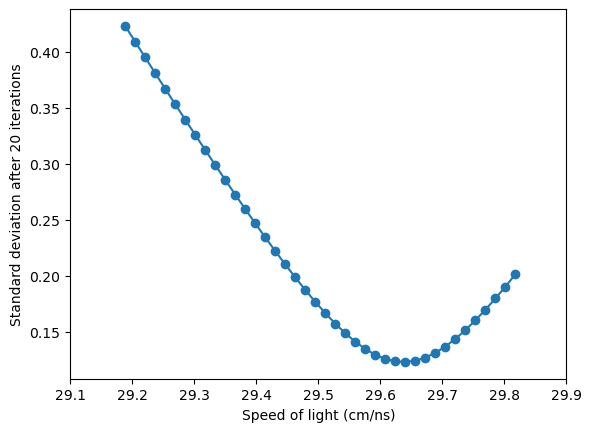

In [2]:
df = pd.read_csv('truth_offsets.txt',sep=' ') # read in text file containing truth offsets for each channel
display(df)
sorted_df = df.sort_values(by=['channel_id']) # sort dataframe according to channel id
sort_df_np = (sorted_df.to_numpy()).transpose()[1] 

cs = []
stds_scans = []
for s in range(40):
    c = 29.18853457 + (0.01613700877*s)
    # print("Scan:"+str(s)+", Speed of light: "+str(c))
    pred_filenames = []
    diff_stds = []
    iter_count = 0
    for i in range(20):
        pred_filenames.append("iter_scans/"+str(s)+"/pred_offsets"+ str(i) +".txt") # get filenames for files containing predicted offsets for each iteration
    diff_stds.append(sort_df_np.std())
    for predfile in pred_filenames: #iterate through filenames for predicted offsets
        # print(predfile)
        df2 = pd.read_csv(predfile,sep=' ')
        sorted_df2 = df2.sort_values(by=['channel_id'])
        # display(sorted_df2)
        sort_df2_np = (sorted_df2.to_numpy()).transpose()[1]
        sort_channel_id = (sorted_df2.to_numpy()).transpose()[0]
        sort_layer_id = np.array([ch_id % 100 for ch_id in np.ndarray.tolist(sort_channel_id)])
        # print(sort_layer_id)
        # print(sort_df_np.shape)
        # print(sort_df2_np.shape)
        diff = sort_df_np - sort_df2_np
        array_diff_layer = np.stack((sort_layer_id,diff),axis=1)
        diff_df = pd.DataFrame(array_diff_layer,columns=['layer_id','diff_offsets'])
        # display(diff_df)
        layer_id_list = diff_df['layer_id'].unique()
        # if iter_count > 13:
        #     for lay in range(len(layer_id_list)):
        #         # if lay in [2,3,8,9,10,11]:
        #         if 1:
        #             layer_df = diff_df[diff_df['layer_id']==layer_id_list[lay]]
        #             plt.title(layer_id_list[lay])
        #             plt.hist((layer_df.to_numpy()).transpose()[1],100,alpha=0.3,range=[-1.5,1.5]) # histogram
        #     plt.show()
        # plt.hist(diff[10000:15000],bins=100)
        # plt.hist()
        # plt.figure(figsize=(15,6))
        # plt.plot(sort_channel_id,sort_df2_np)
        iter_count+=1
        diff_stds.append(diff.std())
        # plt.show()
    # print(diff_stds)
    # plt.plot(range(21),diff_stds)
    # plt.show()
    cs.append(c)
    stds_scans.append(diff_stds[-1])
xticks = np.linspace(29.1,29.9,9)
plt.plot(cs,stds_scans,marker="o")
plt.xlabel("Speed of light (cm/ns)")
plt.xticks(xticks)
plt.ylabel("Standard deviation after 20 iterations")

[   1.4511873   -86.0552861  1275.90809358]


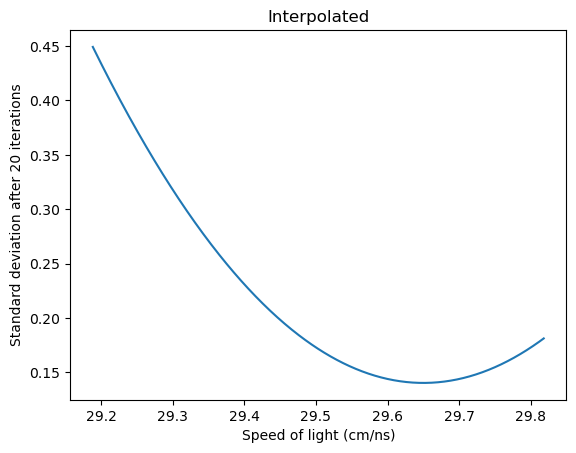

29.65013710142882


In [8]:
p = np.polyfit(cs,stds_scans,deg=2)
print(p)
X_ = np.linspace(min(cs), max(cs), 500)
Y_ = p[2] + p[1]*(X_) + p[0]*(np.square(X_))
plt.plot(X_, Y_)
plt.title("Interpolated")
plt.xlabel("Speed of light (cm/ns)")
plt.ylabel("Standard deviation after 20 iterations")
plt.show()
print(X_[np.argmin(Y_)])

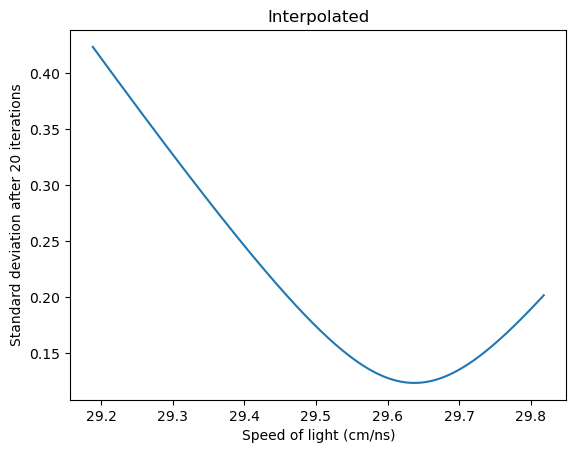

29.637525010406176


In [24]:
from scipy.interpolate import make_interp_spline

c_std_Spline = make_interp_spline(cs, stds_scans)

X_ = np.linspace(min(cs), max(cs), 500)
Y_ = c_std_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Interpolated")
plt.xlabel("Speed of light (cm/ns)")
plt.ylabel("Standard deviation after 20 iterations")
plt.show()
print(X_[np.argmin(Y_)])

,channel_id,true_offset
0,107407,8.664060
1,118606,8.999850
2,99005,4.721910
3,143304,-6.764380
4,144104,-4.475400
...,...,...
52893,67309,-6.651630
52894,121201,-3.605870
52895,94711,3.931830
52896,236301,2.162900


iter_scans/30/pred_offsets0.txt
iter_scans/30/pred_offsets1.txt
iter_scans/30/pred_offsets2.txt
iter_scans/30/pred_offsets3.txt
iter_scans/30/pred_offsets4.txt
iter_scans/30/pred_offsets5.txt
iter_scans/30/pred_offsets6.txt
iter_scans/30/pred_offsets7.txt
iter_scans/30/pred_offsets8.txt
iter_scans/30/pred_offsets9.txt
iter_scans/30/pred_offsets10.txt
iter_scans/30/pred_offsets11.txt
iter_scans/30/pred_offsets12.txt
iter_scans/30/pred_offsets13.txt
iter_scans/30/pred_offsets14.txt


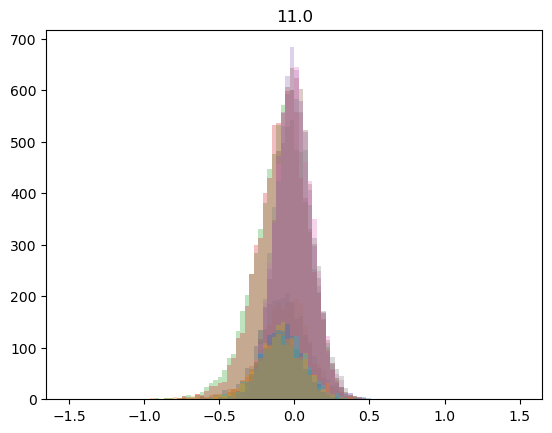

iter_scans/30/pred_offsets15.txt


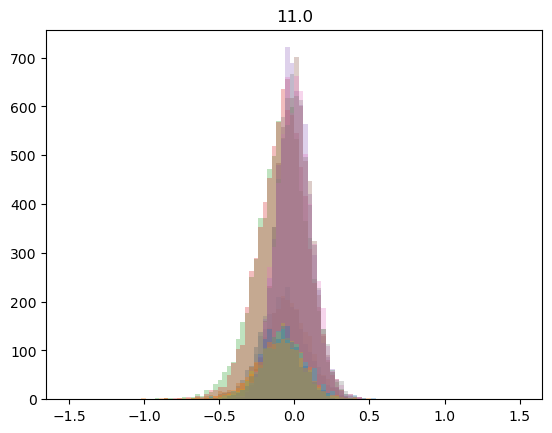

iter_scans/30/pred_offsets16.txt


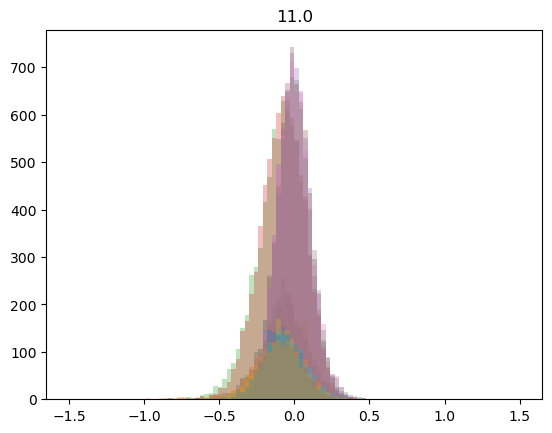

iter_scans/30/pred_offsets17.txt


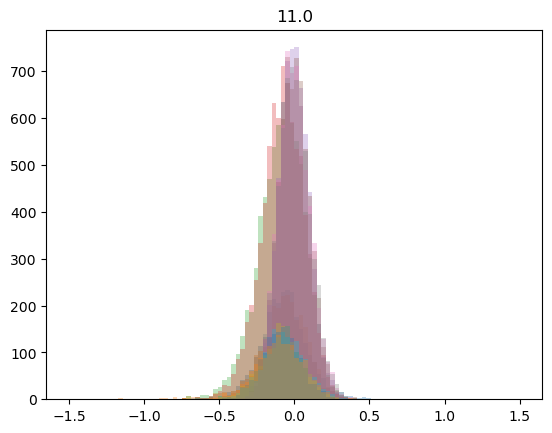

iter_scans/30/pred_offsets18.txt


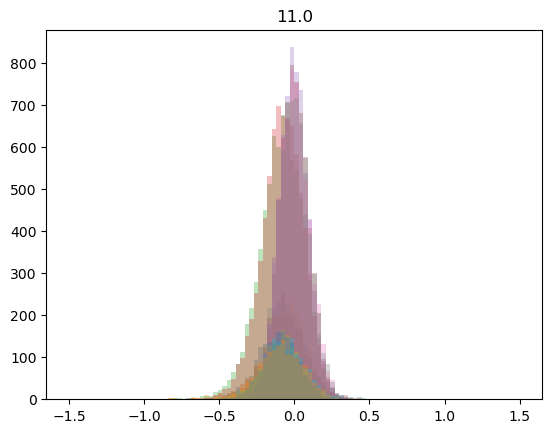

iter_scans/30/pred_offsets19.txt


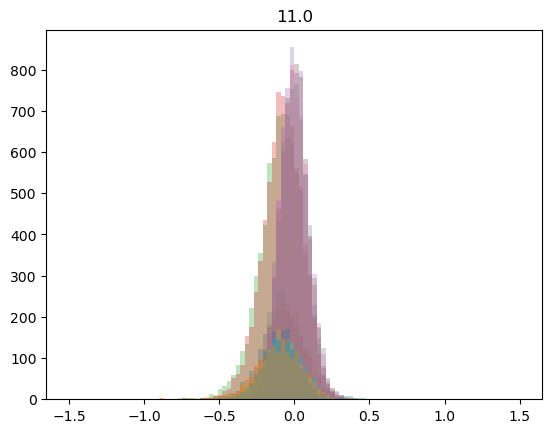

[5.193782626177345, 1.6693503102950704, 0.4960597267897702, 0.2886273992279457, 0.26233817194970394, 0.24885776280839966, 0.23500975568042484, 0.22370181068858053, 0.2142402753151259, 0.20385618476292247, 0.19391112252748532, 0.18526315031540197, 0.17687609177663027, 0.16941606980408674, 0.16245015987226674, 0.15523831141600916, 0.14776080336887085, 0.14155688623758378, 0.13610533133163796, 0.1312155452965618, 0.127256699550722]


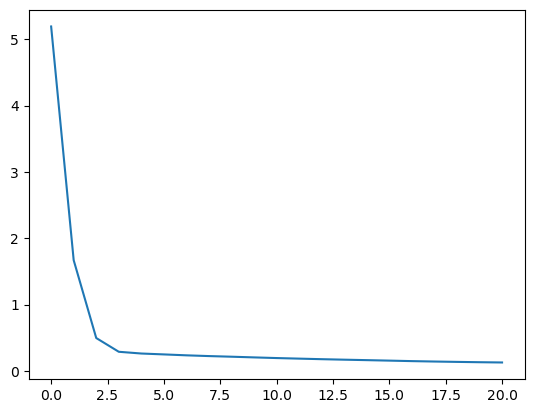

In [26]:
df = pd.read_csv('truth_offsets.txt',sep=' ') # read in text file containing truth offsets for each channel
display(df)
sorted_df = df.sort_values(by=['channel_id']) # sort dataframe according to channel id
sort_df_np = (sorted_df.to_numpy()).transpose()[1] 
pred_filenames = []
diff_stds = []
iter_count = 0
for i in range(20):
    pred_filenames.append("iter_scans/30/pred_offsets"+ str(i) +".txt") # get filenames for files containing predicted offsets for each iteration
diff_stds.append(sort_df_np.std())
for predfile in pred_filenames: #iterate through filenames for predicted offsets
    print(predfile)
    df2 = pd.read_csv(predfile,sep=' ')
    sorted_df2 = df2.sort_values(by=['channel_id'])
    # display(sorted_df2)
    sort_df2_np = (sorted_df2.to_numpy()).transpose()[1]
    sort_channel_id = (sorted_df2.to_numpy()).transpose()[0]
    sort_layer_id = np.array([ch_id % 100 for ch_id in np.ndarray.tolist(sort_channel_id)])
    # print(sort_layer_id)
    # print(sort_df_np.shape)
    # print(sort_df2_np.shape)
    diff = sort_df_np - sort_df2_np
    array_diff_layer = np.stack((sort_layer_id,diff),axis=1)
    diff_df = pd.DataFrame(array_diff_layer,columns=['layer_id','diff_offsets'])
    # display(diff_df)
    layer_id_list = diff_df['layer_id'].unique()
    if iter_count > 13:
        for lay in range(len(layer_id_list)):
            # if lay in [2,3,8,9,10,11]:
            if 1:
                layer_df = diff_df[diff_df['layer_id']==layer_id_list[lay]]
                plt.title(layer_id_list[lay])
                plt.hist((layer_df.to_numpy()).transpose()[1],100,alpha=0.3,range=[-1.5,1.5]) # histogram
        plt.show()
    # plt.hist(diff[10000:15000],bins=100)
    # plt.hist()
    # plt.figure(figsize=(15,6))
    # plt.plot(sort_channel_id,sort_df2_np)
    iter_count+=1
    diff_stds.append(diff.std())
    # plt.show()
print(diff_stds)
plt.plot(range(21),diff_stds)
plt.show()